## **Bike_Sharing_Rental**

#### A. Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### B. Load The Dataset

In [5]:
df=pd.read_csv('Dataset.csv')

In [6]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


### 1. Exploaratory Data Analysis (EDA)

In [8]:
df.shape

(17379, 17)

we have 17379 rows and 17 columns in the dataset

In [10]:
df.describe() #statistical measures of the numerical data

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [12]:
df.duplicated().sum()

0

There are no duplicated records in the dataset

In [14]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the data

In [16]:
df.replace(r'^\s*(\?|NA|N/A|null|None)\s*$',np.nan,regex=True,inplace=True)

Considering null values in the place of inappropriate data

In [18]:
df.isnull().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

After Conversion of inappropriate data to null values the exist null values in the columns --
season, yr, mnth, holiday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered

The data with numerical columns seems to be of object type.

####  Conversion of inappropriate data type into respected column data type

In [22]:
df['dteday']=pd.to_datetime(df['dteday'],errors='coerce', format='%d-%m-%Y')

In [23]:
numeric_cols = [
   'yr','mnth','temp','atemp','hum',
    'windspeed','casual','registered'
]

for col in numeric_cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17373 non-null  object        
 3   yr          17378 non-null  float64       
 4   mnth        17378 non-null  float64       
 5   hr          17379 non-null  int64         
 6   holiday     17378 non-null  object        
 7   weekday     17379 non-null  int64         
 8   workingday  17374 non-null  object        
 9   weathersit  17375 non-null  object        
 10  temp        17368 non-null  float64       
 11  atemp       17373 non-null  float64       
 12  hum         17373 non-null  float64       
 13  windspeed   17374 non-null  float64       
 14  casual      17378 non-null  float64       
 15  registered  17378 non-null  float64       
 16  cnt         17379 non-

There numerica data is explicitly converted into type numeric

#### Outlier Detection

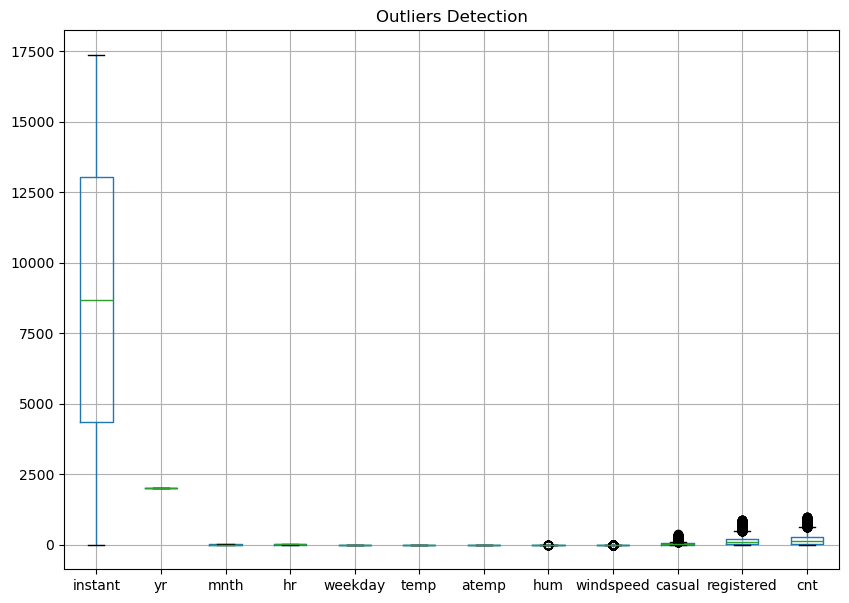

In [27]:
df.boxplot(figsize=(10,7))
plt.title("Outliers Detection")
plt.show()

There exist outliers in the data .

More outliers were there in the columns such as casual,registered,cnt. The outliers present in these columns are real data.

### Handling Null Values

In [30]:
mode_cols=['season','yr','mnth','holiday','workingday','weathersit']
median_cols=['temp','atemp','hum','windspeed','casual','registered']

In [31]:
for col in mode_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [32]:
for col in median_cols:
    df[col].fillna(df[col].median(),inplace=True)

In [33]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

All null values from the data were cleared

###  Handling Outliers

Although outliers are present in the dataset, they represent genuine real-world demand scenarios rather than data anomalies. Removing or transforming these values could negatively impact model performance by eliminating important demand patterns. Therefore, no explicit outlier treatment was applied, as tree-based models such as Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor are inherently insensitive to outliers.

## 2. Data Visualization

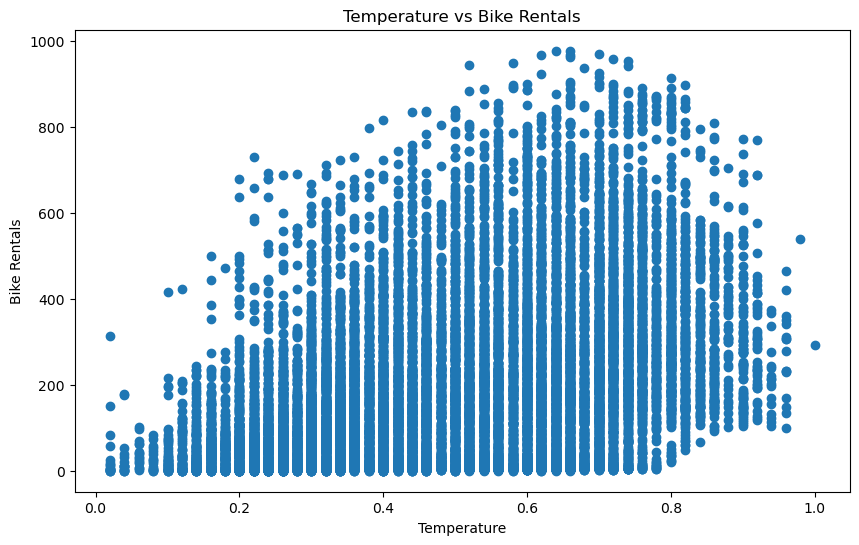

In [38]:

plt.figure(figsize=(10,6))
plt.scatter(df['temp'],df['cnt'])
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')
plt.show()

#### Observations:

As temperature increases from low to moderate levels bike rentals increase.

A moderate warm temperature encourages bike rentals.

Highest rental counts occur roughly between 0.5 to 0.7 normalized temperature.

At very low temperature bike rental were minimum and we can also see decrement of rental count at very high temperature.


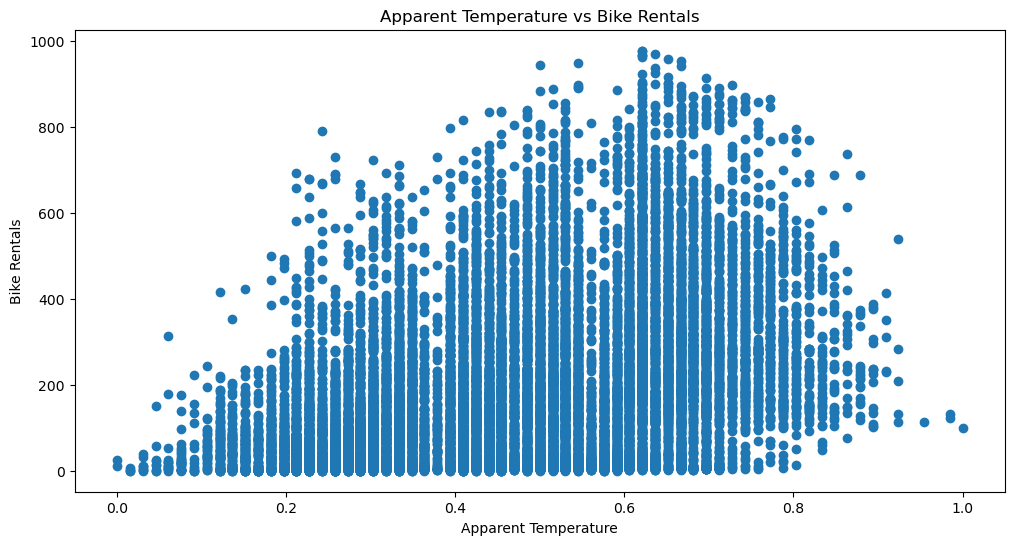

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(df['atemp'],df['cnt'])
plt.title('Apparent Temperature vs Bike Rentals')
plt.xlabel('Apparent Temperature')
plt.ylabel('Bike Rentals')
plt.show()

#### Observations

Perceived Temperature plays a major role here.
    
Bike Rental demand increases as Apparent Temperature Increases.

There are very minimal Bike Rentals at very low apparent temperature and also at very high apparent temperature.

Extreme perceived cold or heat discourages bike usage

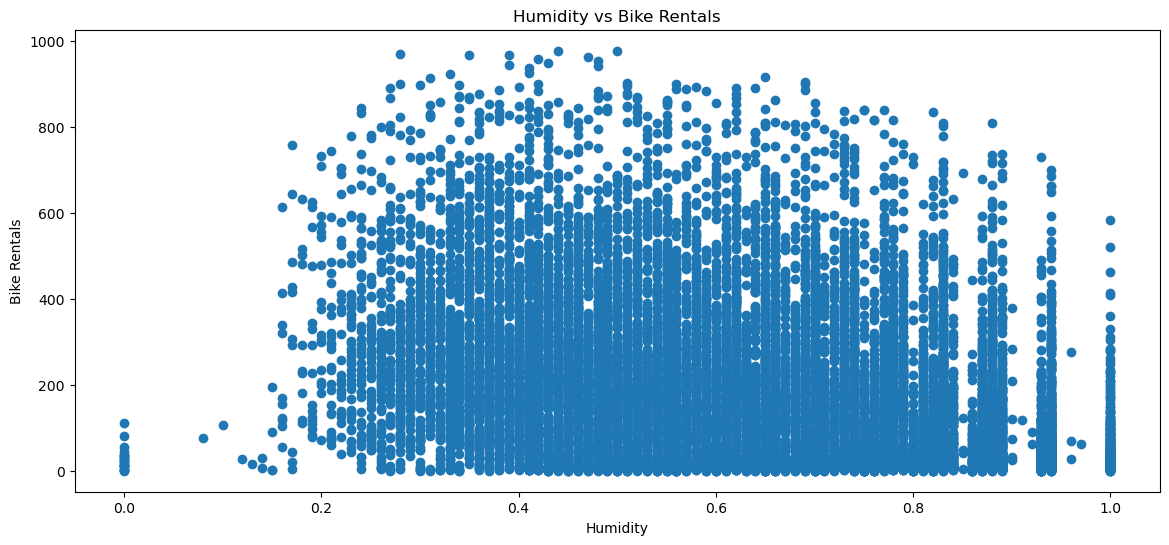

In [42]:
plt.figure(figsize=(14,6))
plt.scatter(df['hum'],df['cnt'])
plt.title('Humidity vs Bike Rentals')
plt.xlabel('Humidity')
plt.ylabel('Bike Rentals')
plt.show()

#### Observations

Maximum bike rentals are observed at low to moderate humidity values (roughly 0.3–0.6).

As humidity increases bike rental were gradually decreases.

Very low or high humidity results in less bike rentals.

Humidity doesn't have much impact on bike rental demand.


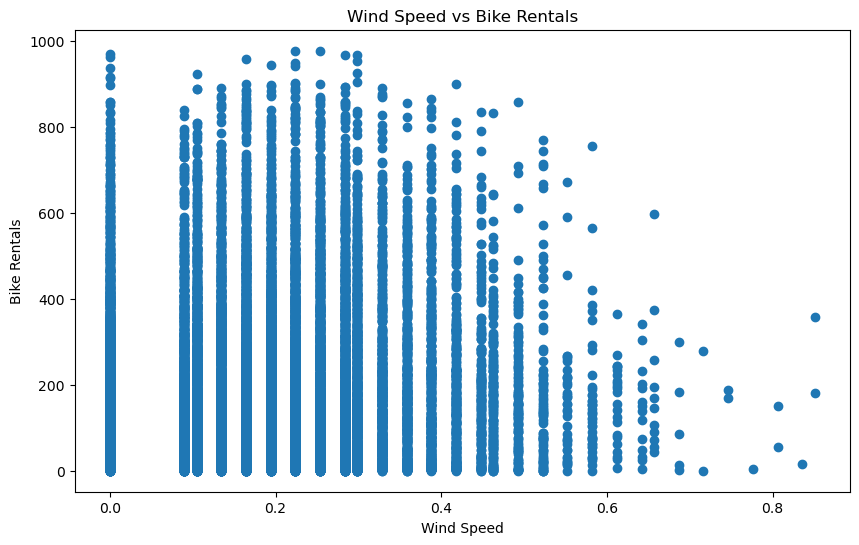

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(df['windspeed'],df['cnt'])
plt.title('Wind Speed vs Bike Rentals')
plt.xlabel('Wind Speed')
plt.ylabel('Bike Rentals')
plt.show()

#### Observations:

As wind speed increases Bike Rental demand decreases.

Maximum rental counts are observed when wind speed is low to moderate (approximately 0.0–0.3).

At higher wind speed counts rental counts are generally lower.

weather with less wind speed leads to more demand for bike rentals.

In [46]:
season_avg=df.groupby('season')['cnt'].mean()

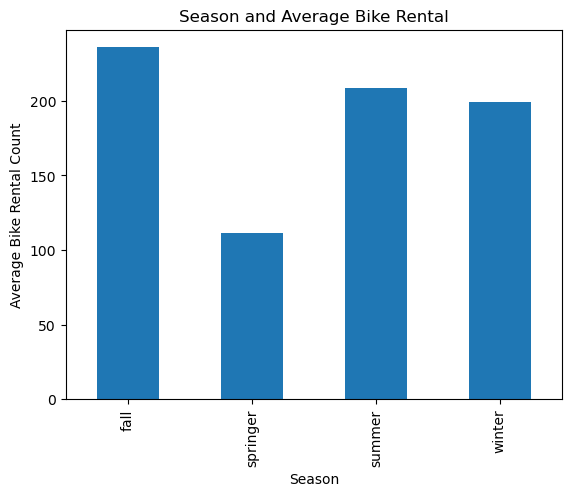

In [47]:
season_avg.plot(kind='bar')
plt.title("Season and Average Bike Rental")
plt.xlabel('Season')
plt.ylabel('Average Bike Rental Count')
plt.show()

#### Observations

Fall shows the highest average bike rental count among all seasons.

Spring has the lowest average bike rental count.

Clear variation across seasons confirms that season is an important predictor of bike rental demand.


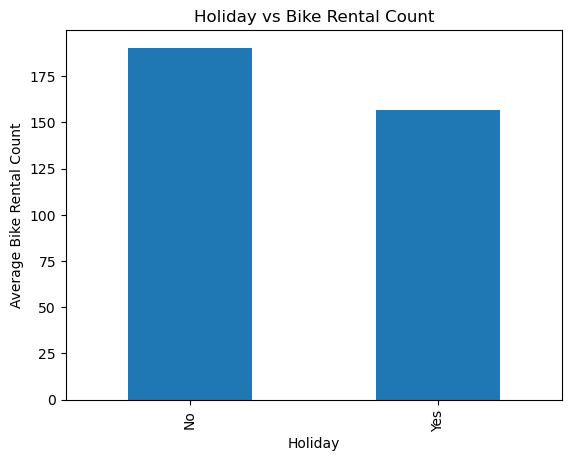

In [49]:
holiday_avg=df.groupby('holiday')['cnt'].mean()
holiday_avg.plot(kind='bar')
plt.title('Holiday vs Bike Rental Count')
plt.xlabel('Holiday')
plt.ylabel('Average Bike Rental Count')
plt.show()

#### Observations:

Average bike rental count is higher on non-holidays compared to holidays, indicates that regular working days contribute more to overall demand.

The drop in rentals on holidays tells that registered users plays a major role in total bike demand.

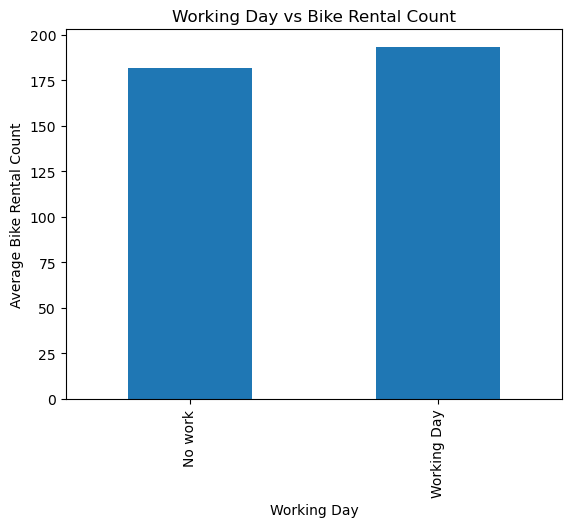

In [51]:
working_avg=df.groupby('workingday')['cnt'].mean()
working_avg.plot(kind='bar')
plt.title('Working Day vs Bike Rental Count')
plt.xlabel('Working Day')
plt.ylabel('Average Bike Rental Count')
plt.show()

#### Observations:

Average bike rental count is higher on working days compared to non-working days.

The clear difference shows that working day status influences bike rental demand.

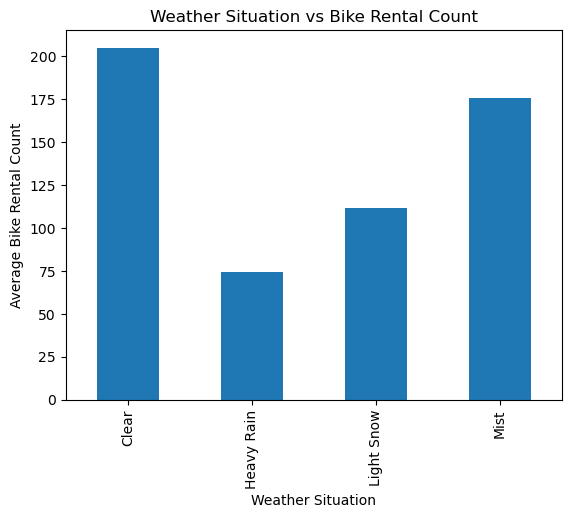

In [53]:
weathersit_avg=df.groupby('weathersit')['cnt'].mean()
weathersit_avg.plot(kind='bar')
plt.title('Weather Situation vs Bike Rental Count')
plt.xlabel('Weather Situation')
plt.ylabel('Average Bike Rental Count')
plt.show()

#### Observation:

Clear weather conditions show the highest average bike rental demand, indicates that favorable weather strongly encourages bike usage.

Heavy rain has the lowest average bike rental count, poor weather conditions significantly discourage bike rentals.

Light snow conditions have lower rentals compared to clear and misty weather, but higher than heavy rain.

Favorable weather conditions significantly increase bike rental demand, while adverse weather reduces usage.

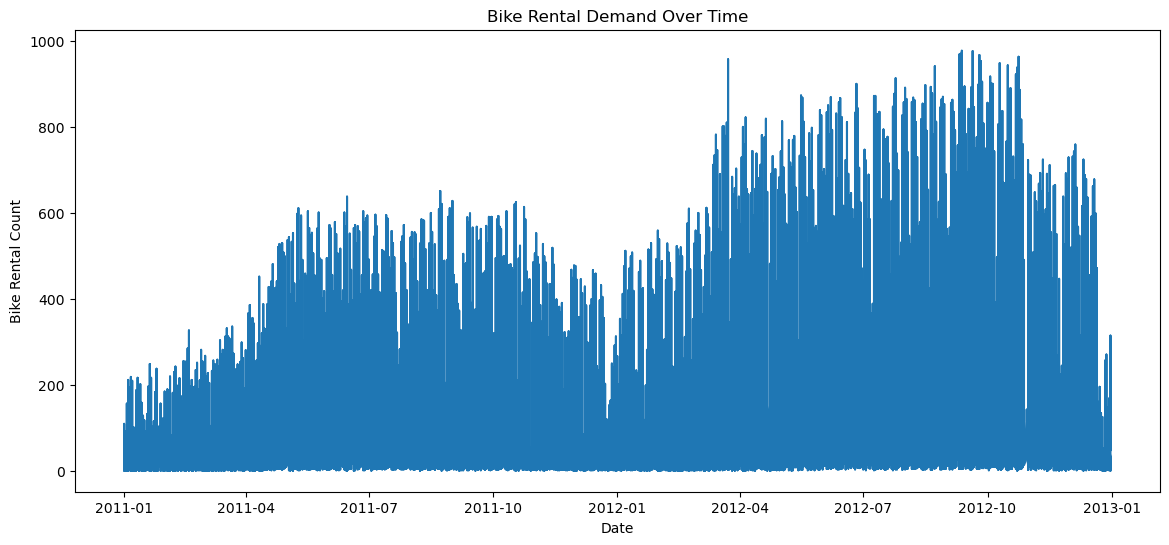

In [55]:
plt.figure(figsize=(14,6))
plt.plot(df['dteday'], df['cnt'])
plt.xlabel('Date')
plt.ylabel('Bike Rental Count')
plt.title('Bike Rental Demand Over Time')
plt.show()

#### Observation:

Bike rental demand shows a clear upward trend from 2011 to 2012.

Indicates growing adoption and usage of the bike rental system over time.

Higher peaks occur during warmer months, while lower values appear in colder months this confirms the presence of seasonality in bike rentals.

Rental counts in 2012 are generally higher than in 2011, suggests system growth and increased user base.

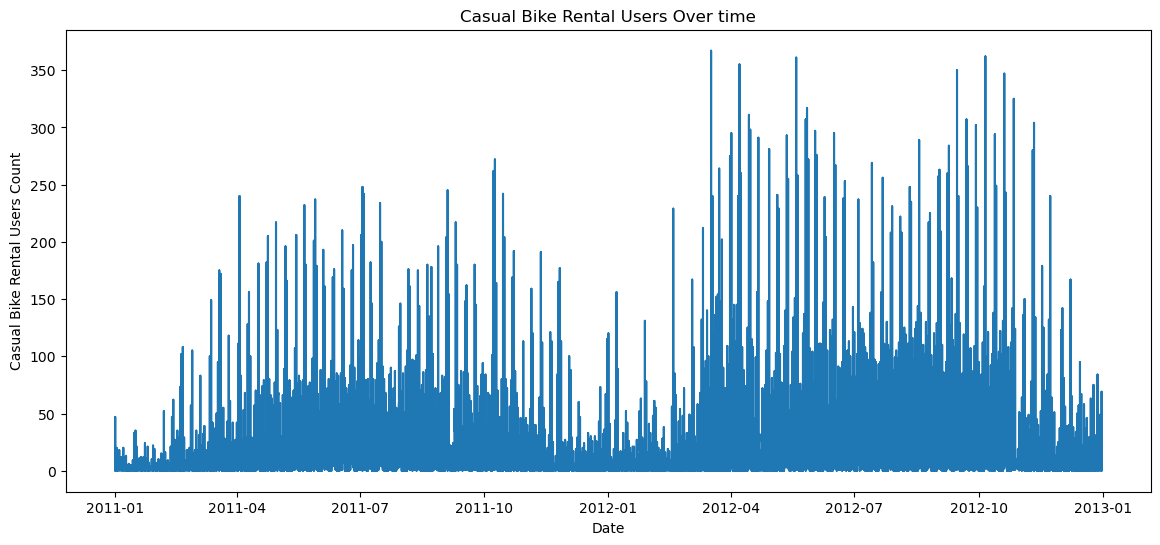

In [57]:
plt.figure(figsize=(14,6))
plt.plot(df['dteday'],df['casual'])
plt.title('Casual Bike Rental Users Over time')
plt.xlabel('Date')
plt.ylabel('Casual Bike Rental Users Count')
plt.show()

#### Observation:

The number of casual bike rentals increases over time, especially from 2011 to 2012, This indicates growing popularity of bike rentals for casual purposes.

Casual rentals show strong seasonal patterns, casual users are more sensitive to weather and season than registered users.

Higher usage is observed during warmer months, while lower usage occurs in colder months.



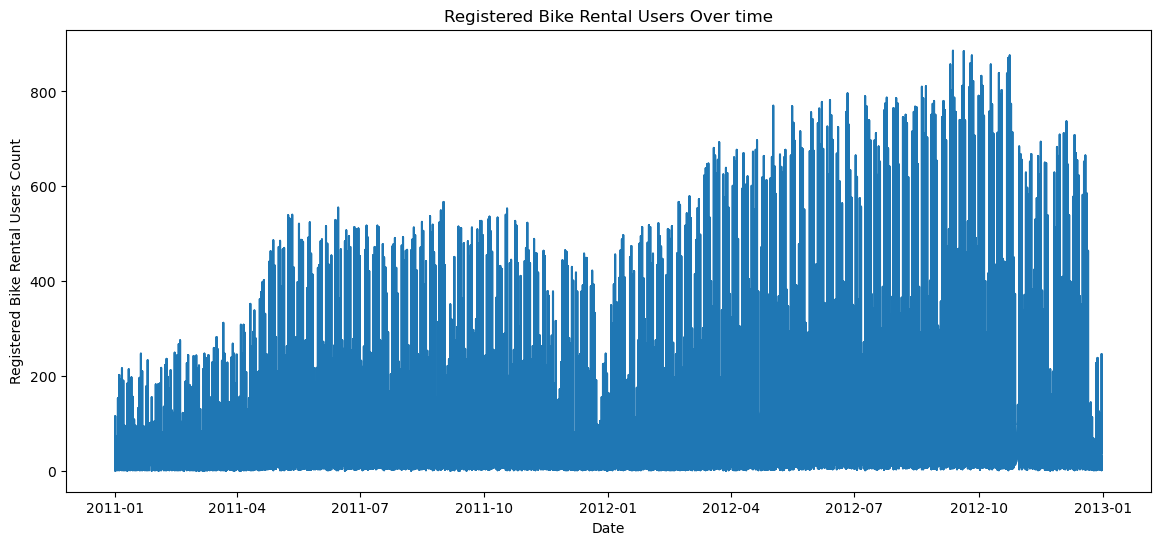

In [59]:
plt.figure(figsize=(14,6))
plt.plot(df['dteday'],df['registered'])
plt.title('Registered Bike Rental Users Over time')
plt.xlabel('Date')
plt.ylabel('Registered Bike Rental Users Count')
plt.show()

#### Observation:

Registered bike rentals show a clear and consistent increase from 2011 to 2012, indicates growth in the number of subscribed users.

While seasonal patterns exist, fluctuations are less extreme than those observed for casual users.

Registered users rely on bikes for daily commuting, making demand more stable.

Compared to casual users, registered users contribute a larger share to overall bike rental demand.

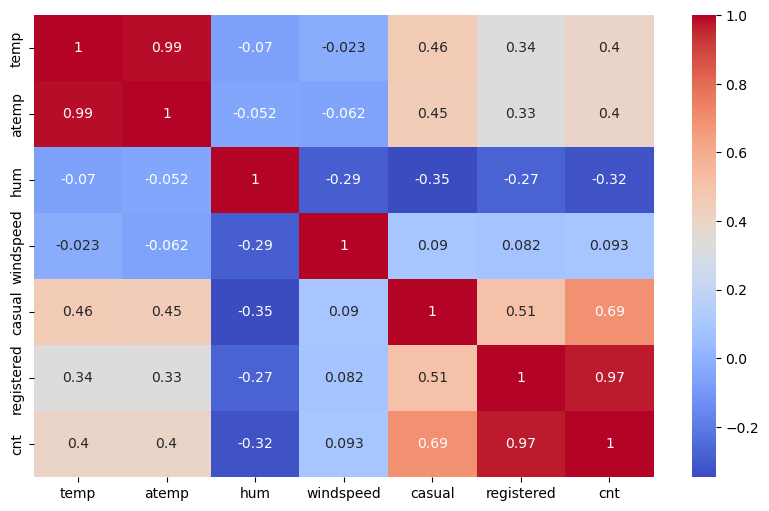

In [61]:
num_cols=['temp','atemp','hum','windspeed','casual','registered','cnt']

corr_matrix=df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()


The correlation heatmap shows a strong positive relationship between registered users and total bike rentals, indicating that registered users are the primary contributors to demand. Temperature variables exhibit moderate positive correlation with rentals, while humidity shows a negative relationship. Apparent temperature and actual temperature are highly correlated, suggesting redundancy. Wind speed has minimal influence on bike rental demand.

### 3. Feature Engineering

##### A. Extracting New Useful Features

In [65]:
df['day']=df['dteday'].dt.day

In [66]:
df['month']=df['dteday'].dt.month

In [67]:
df['year']=df['dteday'].dt.year

In [68]:
df['Weekday'] = df['dteday'].dt.weekday


Since the existing year, month, and weekday columns were inconsistent with the date information, accurate temporal features were extracted from the dteday column and used for model training.

##### B. Creating New Features

In [71]:
df['is_weekend']=df['weekday'].isin([0,6]).astype(int)

In [72]:
df.drop(['yr','mnth','instant','dteday', 'weekday', 'atemp', 'casual', 'registered'],axis=1,inplace=True)

yr and mnth were dropped as the data is redundant and inconsistent.

instant column was dropped as it was just the index number and doesn't add on any value.

dteday column was dropped as we already important insights from it.

In [74]:
df.head()

,season,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,day,month,year,Weekday,is_weekend
0,springer,0,No,No work,Clear,0.24,0.81,0.0,16,1,1,2011,5,1
1,springer,1,No,No work,Clear,0.22,0.80,0.0,40,1,1,2011,5,1
2,springer,2,No,No work,Clear,0.22,0.63,0.0,32,1,1,2011,5,1
3,springer,3,No,No work,Clear,0.24,0.75,0.0,13,1,1,2011,5,1
4,springer,4,No,No work,Clear,0.24,0.75,0.0,1,1,1,2011,5,1


##### C. Encoding Features

In [76]:
df['holiday']=df['holiday'].map({'No':0,'Yes':1})
df['workingday']=df['workingday'].map({'Working Day':1,'No work':0})

In [77]:
cols=['season','weathersit']
df=pd.get_dummies(df,cols)

#Conversion of boolean values into int values
boolean_cols=df.select_dtypes(include='bool').columns
df[boolean_cols]=df[boolean_cols].astype(int)

In [78]:
df.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,day,month,year,Weekday,is_weekend,season_fall,season_springer,season_summer,season_winter,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,0,0,0,0.24,0.81,0.0,16,1,1,2011,5,1,0,1,0,0,1,0,0,0
1,1,0,0,0.22,0.80,0.0,40,1,1,2011,5,1,0,1,0,0,1,0,0,0
2,2,0,0,0.22,0.63,0.0,32,1,1,2011,5,1,0,1,0,0,1,0,0,0
3,3,0,0,0.24,0.75,0.0,13,1,1,2011,5,1,0,1,0,0,1,0,0,0
4,4,0,0,0.24,0.75,0.0,1,1,1,2011,5,1,0,1,0,0,1,0,0,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hr                     17379 non-null  int64  
 1   holiday                17379 non-null  int64  
 2   workingday             17379 non-null  int64  
 3   temp                   17379 non-null  float64
 4   hum                    17379 non-null  float64
 5   windspeed              17379 non-null  float64
 6   cnt                    17379 non-null  int64  
 7   day                    17379 non-null  int64  
 8   month                  17379 non-null  int64  
 9   year                   17379 non-null  int64  
 10  Weekday                17379 non-null  int64  
 11  is_weekend             17379 non-null  int32  
 12  season_fall            17379 non-null  uint8  
 13  season_springer        17379 non-null  uint8  
 14  season_summer          17379 non-null  uint8  
 15  se

##### E. Scaling

The dataset contains numerical features that are already normalized, ensuring consistency in their value ranges. Therefore, no further scaling or normalization was applied during preprocessing.

### 4. Model Building

##### A. Dataset Splitting


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x=df.drop('cnt',axis=1)
y=df['cnt']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [86]:

print("Training features shape:", x_train.shape)
print("Testing features shape:", x_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (13903, 19)
Testing features shape: (3476, 19)
Training target shape: (13903,)
Testing target shape: (3476,)


##### B.Model Building

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

##### 1. Decision Tree Regressor

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
dt=DecisionTreeRegressor(max_depth=8, min_samples_split=20, min_samples_leaf=10, random_state=42)

In [92]:
# Training the model with training set
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=20,
                      random_state=42)

In [93]:
# Model Prediction on Trained set of data and on test data
y_predict_dt=dt.predict(x_test)
y_train_predict_dt=dt.predict(x_train)

In [94]:
# Evaluating Performance of the model on trained data and test data
train_rmse_dt=mean_squared_error(y_train,y_train_predict_dt,squared=False)
train_r2_dt=r2_score(y_train,y_train_predict_dt)
rmse_dt=mean_squared_error(y_test,y_predict_dt,squared=False)
r2_dt=r2_score(y_test,y_predict_dt)


In [95]:
print("Decision Tree Regressor Performance")

print("Training RMSE:", train_rmse_dt)
print("Training R2:", train_r2_dt)

print("Testing RMSE:", rmse_dt)
print("Testing R2 :", r2_dt)

Decision Tree Regressor Performance
Training RMSE: 73.31546079450031
Training R2: 0.8381070731283321
Testing RMSE: 72.53135627326638
Testing R2 : 0.8338629621153006


##### Interpretation:

The training and testing R² scores are both around 83%, indicating that the model performs consistently on both seen and unseen data. 

The model does not suffer from overfitting or underfitting. 

The RMSE value of approximately 72 indicates that, on average, the model’s predictions differ from the actual bike rental count by about 72 bikes.

##### 2. Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor


In [99]:
randomforest=RandomForestRegressor(n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1)

In [100]:
randomforest.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [101]:
y_train_predict_rf=randomforest.predict(x_train)
y_pred_rf=randomforest.predict(x_test)

In [102]:
train_rmse_rf=mean_squared_error(y_train,y_train_predict_rf,squared=False)
train_r2_rf=r2_score(y_train,y_train_predict_rf)

rmse_rf=mean_squared_error(y_test,y_pred_rf,squared=False)
r2_rf=r2_score(y_test,y_pred_rf)

In [103]:
print("Random Forest Regressor Performance")

print("Training RMSE:", train_rmse_rf)
print("Training R2:", train_r2_rf)

print("Testing RMSE:",rmse_rf)
print("Testing R2:",r2_rf)

Random Forest Regressor Performance
Training RMSE: 63.404298596393005
Training R2: 0.8789195175028415
Testing RMSE: 73.02630721610834
Testing R2: 0.8315878013091944


##### Interpretation:

The Random Forest Regressor shows an R² score of around 87.9% on training data and 83.1% on testing data, indicating that the model explains a large portion of the variation in bike rental demand.

The training and testing R² values are close to each other, which suggests that the model generalizes well and does not suffer from significant overfitting.

The RMSE value of approximately 73 bikes on the test data indicates that, on average, the predicted bike demand differs from the actual demand by about 73 bikes.

Compared to the Decision Tree model, Random Forest improves stability by combining multiple decision trees, resulting in more reliable predictions.

##### 3. Gradient Boosting Regression

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
gradientboosting=GradientBoostingRegressor(n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42)

In [107]:
gradientboosting.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=10,
                          min_samples_split=20, n_estimators=300,
                          random_state=42, subsample=0.8)

In [108]:
y_train_predict_gb=gradientboosting.predict(x_train)
y_pred_gbr=gradientboosting.predict(x_test)

In [109]:
train_rmse_gb=mean_squared_error(y_train,y_train_predict_gb,squared=False)
train_r2_gb=r2_score(y_train,y_train_predict_gb)

rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
r2_gbr = r2_score(y_test, y_pred_gbr)

In [110]:
print("Gradient Boosting Regressor Performance")

print("Training RMSE:", train_rmse_gb)
print("Training R2:", train_r2_gb)

print("Testing RMSE:", rmse_gbr)
print("Testing R2  :", r2_gbr)

Gradient Boosting Regressor Performance
Training RMSE: 60.480122654701034
Training R2: 0.8898303260124382
Testing RMSE: 59.183348010470596
Testing R2  : 0.8893850250511095


##### Interpretation:

The Gradient Boosting Regressor achieved an R² score of approximately 88.9% on both training and testing data, indicating that the model explains nearly 89% of the variance in bike rental demand.

The close similarity between training and testing R² values shows that the model generalizes well and does not suffer from overfitting.

The RMSE value of about 59 bikes on the test data indicates that, on average, the model’s predictions differ from the actual bike demand by around 59 bikes, which is lower than both Decision Tree and Random Forest models.

This shows that Gradient Boosting performs better by sequentially correcting the errors made by previous models, resulting in more accurate predictions.

In [216]:
results={"Model":["Decision Tree Regressor","Random Forest Regressor","Gradient Boosting Regressor"],
"R2 Score":[r2_dt,r2_rf,r2_gbr],
        "RMSE Score":[rmse_dt,rmse_rf,rmse_gbr]}
performance_df=pd.DataFrame(results)
performance_df
    

,Model,R2 Score,RMSE Score
0,Decision Tree Regressor,0.833863,72.531356
1,Random Forest Regressor,0.831588,73.026307
2,Gradient Boosting Regressor,0.889385,59.183348


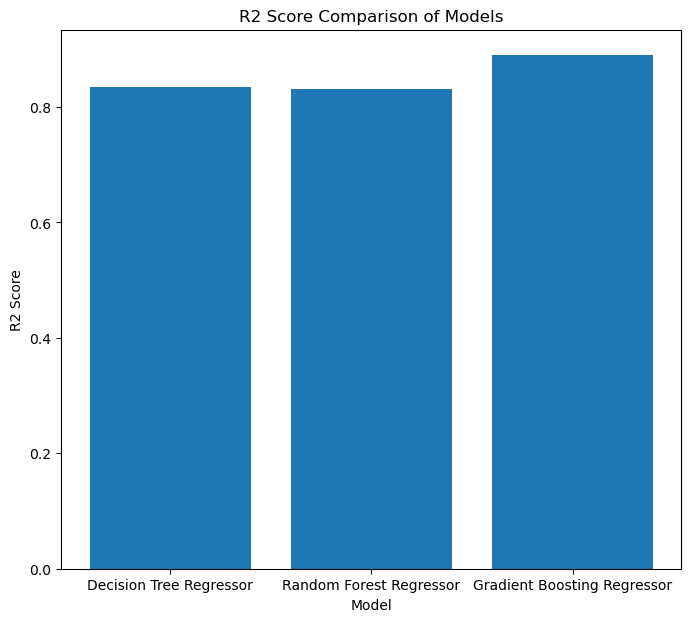

In [213]:
plt.figure(figsize=(8, 7))
plt.bar(results['Model'], results["R2 Score"])
plt.xlabel('Model')

plt.ylabel('R2 Score')
plt.title('R2 Score Comparison of Models')

plt.show()

##### Interpretation: R² Score Comparison 

The Decision Tree Regressor achieved an R² score of around 83%, indicating a reasonable ability to explain the variance in bike rental demand.

The Random Forest Regressor also achieved a similar R² score of approximately 83%, showing slight improvement in stability but not a major increase in accuracy at this stage.

The Gradient Boosting Regressor achieved the highest R² score of about 89%, meaning it explains the maximum variance among the three models.

From this comparison, it is evident that Gradient Boosting performs better than Decision Tree and Random Forest even before tuning, making it a strong candidate for further optimization and final model selection.

### 5. Hyperparameter Tuning Using Random Search

In [112]:
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeRegressor(random_state=42)

param_dist_dt = {
    'max_depth': [None, 5, 8, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20]
}

random_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist_dt,
    n_iter=30,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_dt.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 8, 10, 15, 20],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20,
                                                              30]},
                   random_state=42, scoring='r2')

In [113]:
best_dt = random_dt.best_estimator_

y_train_pred_dt = best_dt.predict(x_train)
y_test_pred_dt = best_dt.predict(x_test)

In [114]:




train_rmse_dt = mean_squared_error(y_train, y_train_pred_dt, squared=False)
train_r2_dt = r2_score(y_train, y_train_pred_dt)


test_rmse_dt = mean_squared_error(y_test, y_test_pred_dt, squared=False)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

print("Best Parameters:",random_dt.best_params_)

print("Decision Tree Regressor Performance")

print("Training RMSE:", train_rmse_dt)
print("Training R2  :", train_r2_dt)

print("Testing RMSE :", test_rmse_dt)
print("Testing R2   :", test_r2_dt)



Best Parameters: {'min_samples_split': 30, 'min_samples_leaf': 1, 'max_depth': 20}
Decision Tree Regressor Performance
Training RMSE: 40.85004512138616
Training R2  : 0.949740076997656
Testing RMSE : 53.53199296741754
Testing R2   : 0.909501435474348


##### Interpretation (After Hyperparameter Tuning – Decision Tree Regressor)

After applying hyperparameter tuning using Randomized Search, the Decision Tree Regressor shows a significant improvement in performance.

The training R² score increased to about 95%, indicating that the model fits the training data very well.

The testing R² score improved to approximately 91%, showing better generalization on unseen data compared to the untuned model.

The training RMSE reduced to around 41, while the testing RMSE reduced to about 53, which means the average prediction error has decreased considerably.

The gap between training and testing performance is reasonable, indicating that the model is well-regularized and does not suffer from severe overfitting.


In [115]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

random_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_rf.fit(x_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 15, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2')

In [116]:
best_rf = random_rf.best_estimator_

y_train_pred_rf = best_rf.predict(x_train)
y_test_pred_rf = best_rf.predict(x_test)


In [117]:


train_rmse_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
train_r2_rf = r2_score(y_train, y_train_pred_rf)


test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Best Parameters:",random_rf.best_params_)

print("Random Forest Regressor Performance")

print("Training RMSE:", train_rmse_rf)
print("Training R2  :", train_r2_rf)

print("Testing RMSE :", test_rmse_rf)
print("Testing R2   :", test_r2_rf)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Random Forest Regressor Performance
Training RMSE: 22.668604927658922
Training R2  : 0.9845230163097533
Testing RMSE : 59.590082924327504
Testing R2   : 0.8878594076925839


##### Interpretation (After Hyperparameter Tuning – Random Forest Regressor)

After applying hyperparameter tuning using Randomized Search, the Random Forest Regressor shows strong performance on the training data.

The training R² score is around 98%, which indicates that the model fits the training data extremely well.

The testing R² score is approximately 89%, showing good generalization to unseen data.

The training RMSE is very low (around 23), while the testing RMSE is about 60, indicating a noticeable difference between training and testing errors.

This difference between training and testing performance suggests that the model has slight overfitting, even though Random Forest is generally robust due to averaging multiple trees.



In [118]:


gbr = GradientBoostingRegressor(random_state=42)

param_dist_gbr = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0]
}

random_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist_gbr,
    n_iter=30,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_gbr.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05,
                                                          0.1],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2')

In [119]:
best_gbr = random_gbr.best_estimator_

y_train_pred_gbr = best_gbr.predict(x_train)
y_test_pred_gbr = best_gbr.predict(x_test)


In [120]:



train_rmse_gbr = mean_squared_error(y_train, y_train_pred_gbr, squared=False)
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)


test_rmse_gbr = mean_squared_error(y_test, y_test_pred_gbr, squared=False)
test_r2_gbr = r2_score(y_test, y_test_pred_gbr)

print("Best Parameters:",random_gbr.best_params_)

print("Gradient Boosting Regressor Performance")
print("Training RMSE:", train_rmse_gbr)
print("Training R2  :", train_r2_gbr)
print("Testing RMSE :", test_rmse_gbr)
print("Testing R2   :", test_r2_gbr)


Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting Regressor Performance
Training RMSE: 36.32825550720917
Training R2  : 0.9602510350163183
Testing RMSE : 40.24053120303357
Testing R2   : 0.9488621722201347


##### Interpretation (After Hyperparameter Tuning – Gradient Boosting Regressor)

After applying hyperparameter tuning using Randomized Search, the Gradient Boosting Regressor shows excellent and well-balanced performance.

The training R² score is about 96%, indicating that the model fits the training data very well.

The testing R² score is approximately 95%, which shows strong generalization on unseen data.

The training RMSE is around 36, while the testing RMSE is about 40, meaning the prediction error remains consistently low on both training and testing datasets.

The close similarity between training and testing performance indicates that the model does not suffer from overfitting or underfitting.



In [223]:
Results={"Model":["Decision Tree Regressor","Random Forest Regressor","Gradient Boosting Regressor"],
"R2 Score":[test_r2_dt,test_r2_rf,test_r2_gbr],
        "RMSE Scor":[test_rmse_dt,test_rmse_rf,test_rmse_gbr]}
Performance_df=pd.DataFrame(Results)
Performance_df
    

,Model,R2 Score,RMSE Scor
0,Decision Tree Regressor,0.909501,53.531993
1,Random Forest Regressor,0.887859,59.590083
2,Gradient Boosting Regressor,0.948862,40.240531


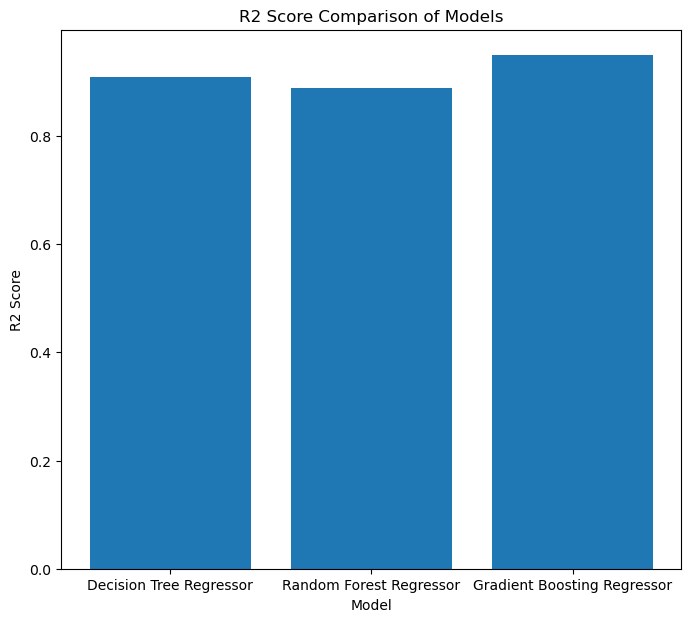

In [122]:
plt.figure(figsize=(8, 7))
plt.bar(Results['Model'], Results["R2 Score"])
plt.xlabel('Model')

plt.ylabel('R2 Score')
plt.title('R2 Score Comparison of Models')

plt.show()

##### Interpretation: R² Score Comparison (After Hyperparameter Tuning)

The above bar chart shows the R² score comparison of all three models after applying hyperparameter tuning.

The Decision Tree Regressor achieved a testing R² score of around 91%, showing significant improvement after tuning.

The Random Forest Regressor achieved a testing R² score of approximately 89%, which is better than its untuned version but slightly lower than the tuned Decision Tree.

The Gradient Boosting Regressor achieved the highest R² score of about 95%, indicating the best ability to explain variance in bike rental demand.

From this comparison, it is clear that hyperparameter tuning improved all models, but Gradient Boosting consistently outperformed the others.

### Conclusion:
Based on post-tuning performance, Gradient Boosting Regressor was selected as the final model due to its superior accuracy and stability.

In [125]:
import joblib
joblib.dump(best_gbr, "bike_demand_model.pkl")

['bike_demand_model.pkl']

In [126]:

joblib.dump(x_test, "x_test.pkl")
joblib.dump(y_test, "y_test.pkl")


['y_test.pkl']